# PROJEKT ZUM NLP 
Autor: Mateusz Bednarek s18579

## Spis tresci
<font color=green>Rekomendowane jest uzycie VSC, aby hiperlacza w tym spisie tresci dzialaly : )</font>
- [Etap 1: Zbieranie Danych](#etap-1-zbieranie-danych)
  - [1.1 Zbieranie danych](#11-zbieranie-danych)
    - [1.1.1 Instalacja bibliotek](#111-instalacja-bibliotek)
    - [1.1.2 Import blibliotek](#112-import-blibliotek)
    - [1.1.3 Scraping](#113-scraping)
    - [1.1.4 Zapis scrapowanych tweetow do csv](#114-zapis-scrapowanych-tweetow-do-csv)
  - [1.2 Czyszczenie danych](#12-czyszczenie-danych)
    - [1.2.1 Instalacja bibliotek](#121-instalacja-bibliotek)
    - [1.2.2 Import bibliotek](#122-import-bibliotek)
    - [1.2.3 Konfiguracja bibliotek](#123-konfiguracja-bibliotek)
    - [1.2.4 Funkcje do czyszczenia danych](#124-funkcje-do-czyszczenia-danych)
    - [1.2.5 Czyszczenie scrapowanych danych](#125-czyszczenie-scrapowanych-danych)
  - [1.3 Analiza tonacji](#13-analiza-tonacji)
    - [1.3.1 Instalacja bibliotek](#131-instalacja-bibliotek)
    - [1.3.2 Importowanie bibliotek](#132-importowanie-bibliotek)
    - [1.3.3 Zczytywanie danych](#133-zczytywanie-danych)
    - [1.3.4 Uzycie Word2Vec modelu](#134-uzycie-word2vec-modelu)
    - [1.3.5 Uzycie KMeans modelu](#135-uzycie-kmeans-modelu)
    - [1.3.6 Etykietowanie danych](#136-etykietowanie-danych)
    - [1.3.7 Sprawdzanie przykladowych danych](#137-sprawdzanie-przykladowych-danych)
- [Etap 2: Classic ML](#etap-2-classic-ml)
  - [2.1 Przygotowanie danych do modeli](#21-przygotowanie-danych-do-modeli)
    - [2.1.1 Importowanie bibliotek](#211-importowanie-bibliotek)
    - [2.1.2 Zaladowywanie danych](#212-zaladowywanie-danych)
    - [2.1.3 Transformacja danych do modeli](#213-transformacja-danych-do-modeli)
  - [2.2 Naiwny Bayes](#22-naiwny-bayes)
    - [2.2.1 Trenowanie Modelu](#221-trenowanie-modelu)
    - [2.2.2 Wizualizacja Modelu](#222-wizualizacja-modelu)
  - [2.3 Regresja logistyczna](#23-regresja-logistyczna)
    - [2.3.1 Trenowanie Modelu](#231-trenowanie-modelu)
    - [2.3.2 Wizualizacja Modelu](#232-wizualizacja-modelu)
  - [2.4 Drzewo decyzyjne](#24-drzewo-decyzyjne) 
    - [2.4.1 Trenowanie Modelu](#241-trenowanie-modelu)
    - [2.4.2 Wizualizacja Modelu](#242-wizualizacja-modelu)
- [Etap 3: Neural Model](#etap-3-neural-model) 
  - [3.1 Model BLSTM](#31-model-blstm) 
    - [3.1.1 Instalacja bibliotek](#311-instalacja-bibliotek) 
    - [3.1.2 Import bibliotek](#312-import-bibliotek) 
    - [3.1.3 Zczytywanie danych](#313-zczytywanie-danych) 
    - [3.1.4 Przygotowywanie danych](#314-przygotowywanie-danych) 
    - [3.1.5 Uczenie modelu](#315-uczenie-modelu) 
    - [3.1.6 Wizualizacja](#316-wizualizacja) 
    - [3.1.7 Test modelu](#317-test-modelu) 
- [Etap 4: Language Model](#etap-4-language-model) 
  - [4.1 DistilBERT model](#41-distilbert-model) 
    - [4.1.1 Instalacja bibliotek](#411-instalacja-bibliotek) 
    - [4.1.2 Importowanie bibliotek](#412-importowanie-bibliotek) 
    - [4.1.3 Zczytywanie danych](#413-zczytywanie-danych) 
    - [4.1.4 Przygotowywanie danych](#414-przygotowywanie-danych) 
    - [4.1.5 Uczenie modelu](#415-uczenie-modelu) 
    - [4.1.6 Testowanie modelu](#416-testowanie-modelu) 

## Etap 1: Zbieranie Danych


### 1.1 Zbieranie danych

#### 1.1.1 Instalacja bibliotek

In [ ]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-gwew7i_o
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-gwew7i_o
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit 786815dd05681e2421cd03aa9acf5ab5c773bce9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


#### 1.1.2 Import blibliotek

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from datetime import date
from dateutil import rrule
from dateutil.relativedelta import relativedelta

#### 1.1.3 Scraping

In [ ]:
posts = []

date_range = [date(2022,9,1), date(2023,5,21)]
language = 'lang:en'
filter = '-filter:retweets'

tweet_limit = 2500


for month_start in rrule.rrule(rrule.MONTHLY, dtstart=date_range[0], until=date_range[1]):
  since_date = f'{month_start+relativedelta(day=2):%Y-%m-%d}'
  until_date = f'{(month_start+relativedelta(months=1)):%Y-%m-%d}'

  print(f"Scrapping data range: {since_date} - {until_date}")
  query = f'#KingCharles {language} {filter} since:{since_date} until:{until_date}'
  scraper = sntwitter.TwitterSearchScraper(query)
  for i, post in enumerate(scraper.get_items()):
    if i >= tweet_limit: break
    posts.append([post.date,post.content])


#### 1.1.4 Zapis scrapowanych tweetow do csv

In [ ]:
posts_df = pd.DataFrame(posts)
posts_df.to_csv('scrapped_posts.csv')

### 1.2 Czyszczenie danych

#### 1.2.1 Instalacja bibliotek

In [1]:
!pip install demoji
!pip install -U spacy
!python -m spacy download en_core_web_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-05-24 12:23:20.059054: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 12:23:23.315701: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-24 12:23:27.491252: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-24 12:23:27.491872

#### 1.2.2 Import  bibliotek

In [2]:
import re
import demoji
import spacy
import numpy
import pandas as pd
from tqdm import tqdm

#### 1.2.3 Konfiguracja bibliotek

In [3]:
tqdm.pandas()
demoji.download_codes()
nlp = spacy.load("en_core_web_md", disable=['ner', 'parser'])
nlp.add_pipe('sentencizer')

<ipython-input-3-68aa388a43e4>:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


#### 1.2.4 Funkcje do czyszczenia danych

In [4]:
def remove_stopwords(text):
  return ' '.join(filter(lambda x:x not in nlp.Defaults.stop_words, text.split()))

def lemm(text):
  return ' '.join([x.lemma_ for x in nlp(text)])

def replace_emoji(post):
  demoji_post = demoji.findall(post)
  new_post = post
  for emoji, meaning in demoji_post.items(): new_post = new_post.replace(emoji, meaning)
  return new_post

def drop_small_tweets(post):
  if len(post.split()) > 2: return post
  else: return ''

In [5]:
def clean_posts(df):
  # 1. Duplikaty
  df.drop_duplicates(subset=['text'],inplace=True)

  # # 2. Emoji
  df['text'] = df['text'].apply(replace_emoji)

  # 3. Wzmianki
  re_at = re.compile(r'\@\w+')
  df['text'] = df['text'].apply(lambda x: re_at.sub('',x))

  # 4. Hashtagi
  re_hash = re.compile(r'\#\w+')
  df['text'] = df['text'].apply(lambda x: re_hash.sub('',x))

  # 5. URL
  re_url = re.compile(r'((www.[^\s]+)|(https?://[^\s]+))')
  df['text'] = df['text'].apply(lambda x: re_url.sub('',x))

  # 6. Wyrazenia regularne
  re_chars = re.compile(r"[^a-zA-Z\s']")
  df['text'] = df['text'].apply(lambda x: re_chars.sub('',x))

  re_suffixes = re.compile(r"\'[a-zA-Z]*")
  df['text'] = df['text'].apply(lambda x: re_suffixes.sub('',x))

  re_plus = re.compile(r",")
  df['text'] = df['text'].apply(lambda x: re_plus.sub(' ',x))

  re_dot = re.compile(r"\.")
  df['text'] = df['text'].apply(lambda x: re_dot.sub(' ',x))

  re_ex = re.compile(r"!")
  df['text'] = df['text'].apply(lambda x: re_ex.sub(' ! ',x))

  re_que = re.compile(r"\?")
  df['text'] = df['text'].apply(lambda x: re_que.sub(' ? ',x))

  re_kek = re.compile(r"'")
  df['text'] = df['text'].apply(lambda x: re_kek.sub(' ',x))

  # 7. Zmniejszenie
  df['text'] = df['text'].apply(lambda x: x.lower())

  # 8. Stopwords
  df['text'] = df['text'].apply(remove_stopwords)

  # 9. Lemmatyzacja
  df['text'] = df['text'].progress_apply(lemm)

  # 10. Male tweety
  df['text']= df['text'].apply(drop_small_tweets)

  re_kekw = re.compile(r"\bve\b")
  df['text'] = df['text'].apply(lambda x: re_kekw.sub(' ',x))
  re_i = re.compile(r"\b[Ii]\b")
  df['text'] = df['text'].apply(lambda x: re_i.sub(' ',x))

  # 11. Null
  df['text'].replace('', numpy.nan, inplace=True) 
  df.dropna(subset=['text'], inplace=True)

  

  df.to_csv("clean_posts.csv")
  return df

#### 1.2.5 Czyszczenie scrapowanych danych

In [ ]:
posts_df = pd.read_csv('scrapped_posts.csv')
posts_df = posts_df.set_axis(['id','date','text'], axis = 1)

print(f'Dataframe shape: {posts_df.shape}')
posts_df.head(10)

In [7]:
clean_df = clean_posts(posts_df)
clean_df.head(100)

100%|██████████| 22327/22327 [01:27<00:00, 254.60it/s]


,id,date,text
0,0,2022-09-30 23:59:50+00:00,prince harry blindsided king charle camilla qu...
1,1,2022-09-30 23:58:47+00:00,king charle iii coin portrait unveil uk royal ...
2,2,2022-09-30 23:58:03+00:00,overhear girl think king charles kill girl lik...
3,3,2022-09-30 23:57:45+00:00,choose believe god infinite mercy church heave...
4,4,2022-09-30 23:55:27+00:00,ban people support canada country trouble mobi...
...,...,...,...
95,95,2022-09-30 22:33:32+00:00,britain royal mint reveal coin feature image k...
96,96,2022-09-30 22:32:55+00:00,baloney king charle strip princess beatrice pr...
97,97,2022-09-30 22:32:43+00:00,meghan tell truth doesn know real truth reason...
98,98,2022-09-30 22:31:30+00:00,princessss beatrice eugenie descendant monarch...


In [8]:
print(f'Dataframe shape: {clean_df.shape}')

Dataframe shape: (21978, 3)


### 1.3 Analiza tonacji

#### 1.3.1 Instalacja bibliotek

In [1]:
!pip install unidecode -q
!pip install gensim==4.3.1 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 17.5 MB/s eta 0:00:00


#### 1.3.2 Importowanie bibliotek

In [2]:
import re
import logging
import numpy as np
import pandas as pd
import multiprocessing

from re import sub
from time import time 
from unidecode import unidecode
from gensim.models import Word2Vec
from collections import defaultdict
from gensim.models import KeyedVectors
from gensim.test.utils import get_tmpfile
from gensim.models.phrases import Phrases, Phraser

logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

#### 1.3.3 Zczytywanie danych

In [3]:
clean_df = pd.read_csv('clean_posts.csv', index_col=[0])
clean_df.sample(10)

,id,date,text
9800,9800,2022-12-30 10:02:46+00:00,king charles iii christmas address pay tribute...
20551,20551,2023-05-23 09:20:23+00:00,oh hospital daty thailand cost k imagine cost ...
19682,19682,2023-04-30 16:28:09+00:00,coronation king charles iii
6441,6441,2022-11-29 23:10:32+00:00,contrary king charles heir pull harry meghan a...
19501,19501,2023-04-30 17:00:38+00:00,guess vote leaflet say x say king charles nonc...
10232,10232,2023-01-31 19:49:14+00:00,lady susan hussey attend church king charle month
1251,1251,2022-09-30 13:17:59+00:00,diana get pass affair yell racism be not go ki...
6067,6067,2022-11-30 10:30:16+00:00,king charle iii reveal royal monogram top tudo...
4256,4256,2022-10-30 20:43:39+00:00,king charle wait scrap scrap son get dirty sit...
10527,10527,2023-01-31 15:24:52+00:00,do not love bit sparkle fun filming segment cr...


In [4]:
clean_df.drop(columns=['id'], inplace=True)
clean_df.drop(columns=['date'], inplace=True)
clean_df.sample(10)


,text
20793,king charles iii invite
3904,king charles go queen wish
10758,sacred ceremony private
2858,superb king charles praise planning cop amid r...
4670,king charle seat
2866,king charles feel betray meghan markle intervi...
10329,can not multiple british royal prince princess...
1221,coin feature king charles iii unveil royal mint
19231,mrs nichol post beautifully design write card ...
2711,king charles can not say that s fine ill host ...


#### 1.3.4 Uzycie Word2Vec modelu

In [5]:
file_model = clean_df.copy()
file_model["text"] = file_model["text"].apply(lambda x: x.split())
file_model["text"] = file_model[file_model["text"].str.len() > 1]
file_model.reset_index(inplace=True)

In [6]:
sent = [row for row in file_model.text]
phrases = Phrases(sent, min_count=1, progress_per=50000)
bigram = Phraser(phrases)
sentences = bigram[sent]
sentences[1]

['king', 'charle', 'iii', 'coin_portrait', 'unveil', 'uk', 'royal_mint']

In [7]:
w2v_model = Word2Vec(min_count=3,
                     window=2,
                     vector_size=500,
                     sample=1e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=multiprocessing.cpu_count()-1)

w2v_model.build_vocab(sentences, progress_per=50000)


In [8]:
w2v_model.train(sentences,
                total_examples=w2v_model.corpus_count,
                epochs=200,
                report_delay=1)
w2v_model.init_sims(replace=True)
w2v_model.save('word2vec.model')

<ipython-input-8-e085b59d00af>:5: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [9]:
file_export = file_model.copy()
file_export["old_text"] = file_export["text"]
file_export["old_text"] = file_export["old_text"].str.join(' ')
file_export["text"] = file_export["text"].apply(lambda x: ' '.join(bigram[x]))
file_export["text"].to_csv('cleaned_dataset.csv', index=False)

#### 1.3.5 Uzycie KMeans modelu

In [10]:
from sklearn.cluster import KMeans
word_vectors = Word2Vec.load("word2vec.model").wv

model = KMeans(n_clusters=2,
               max_iter=10000,
               random_state=True,
               n_init=50)
model.fit(X=word_vectors.vectors.astype('double'))

KMeans(max_iter=10000, n_clusters=2, n_init=50, random_state=True)

In [11]:
words = pd.DataFrame(word_vectors.index_to_key)
words.columns = ['words']
words['vectors'] = words.words.apply(lambda x: word_vectors[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])
words['cluster_value'] = [1 if i == 1 else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1 / (model.transform([x.vectors]).min()), axis=1)
words['sentiment_coeff'] = words.closeness_score * words.cluster_value
words[['words', 'sentiment_coeff']].to_csv('sentiment_dictionary.csv', index=False)


#### 1.3.6 Etykietowanie danych

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [13]:
def create_tfidf_dictionary(x, transformed_file, features):
    vector_coo = transformed_file[x.name].tocoo()
    vector_coo.col = features.iloc[vector_coo.col].values
    dict_from_coo = dict(zip(vector_coo.col, vector_coo.data))
    return dict_from_coo

def replace_tfidf_words(x, transformed_file, features):
    dictionary = create_tfidf_dictionary(x, transformed_file, features)

    return list(map(lambda y: dictionary[f'{y}'], x.text.split()))


def replace_sentiment_words(word, sentiment_dict):
    try:
        out = sentiment_dict[word]
    except KeyError:
        out = 0
    return out

In [14]:
final_file = pd.read_csv('cleaned_dataset.csv')
sentiment_map = pd.read_csv('sentiment_dictionary.csv')
sentiment_dict = dict(zip(sentiment_map.words.values, sentiment_map.sentiment_coeff.values))

In [15]:
file_weighting = final_file.copy()
tfidf = TfidfVectorizer(tokenizer=lambda y: y.split(), norm=None)
tfidf.fit(file_weighting.text)
features = pd.Series(tfidf.get_feature_names_out())
transformed = tfidf.transform(file_weighting.text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [16]:
replaced_tfidf_scores = file_weighting.apply(lambda x: replace_tfidf_words(x, transformed, features), axis=1)


In [17]:
replaced_closeness_scores = file_weighting.text.apply(lambda x: list(map(lambda y: replace_sentiment_words(y, sentiment_dict), x.split())))

In [18]:
replacement_df = pd.DataFrame(data=[replaced_closeness_scores, replaced_tfidf_scores, file_weighting.text]).T
replacement_df.columns = ['sentiment_coeff', 'tfidf_scores', 'text']
replacement_df['sentiment_rate'] = replacement_df.apply( lambda x: np.array(x.loc['sentiment_coeff']) @ np.array(x.loc['tfidf_scores']), axis=1)
replacement_df['prediction'] = (replacement_df.sentiment_rate > 0).astype('int8')

print(replacement_df.groupby(['prediction']).count())
replacement_df[["text", "sentiment_rate", "prediction"]].to_csv("labeled_data.csv")

            sentiment_coeff  tfidf_scores   text  sentiment_rate
prediction                                                      
0                      8021          8021   8021            8021
1                     13957         13957  13957           13957


#### 1.3.7 Sprawdzanie przykladowych danych

In [19]:
replacement_df[replacement_df['prediction'] == 0].sample(20)

,sentiment_coeff,tfidf_scores,text,sentiment_rate,prediction
15577,"[1.0948387957328694, -1.039169655350456, -1.07...","[5.8679440160942, 6.793150111626308, 11.480694...",feel proud flag_united kingdomflag_united king...,-49.455269,0
1042,"[1.0914187023896162, -1.165300975283335, -1.21...","[4.9719767571919595, 7.126641720109383, 5.5089...",look new_p coin_feature king charles_iii spot_...,-16.632154,0
19797,"[-1.0315412264992698, 1.0106192145357895, -1.1...","[1.0695162351342271, 1.9275693479382094, 9.388...",king charles hold_audience buckingham_palace n...,-5.932140,0
20665,"[-1.0917550230365904, -1.1164399627847024, 1.0...","[8.800618153681054, 9.611548369897383, 8.05340...",phil jackson ruin melo career,-12.927502,0
1033,"[-1.2251285229336548, -1.183188590982993, -1.0...","[7.260173112733906, 6.778335025841167, 1.06951...",official_coin effigy king charles_iii unveil_r...,-35.503524,0
1055,"[-1.2406275633745774, -1.2788291689886977, -1....","[4.98168557131892, 6.56702593217396, 5.6507352...",royal_mint unveil_coin feature king charles_iii,-25.383842,0
13405,"[1.048232768944727, -1.1346789732248934, -1.15...","[5.388370935832314, 8.599947458218903, 6.10000...",watch music_act reportedly_decline perform cor...,-20.122684,0
5844,"[-1.161189001496431, -1.0315412264992698, -1.0...","[8.289792529915065, 1.0695162351342271, 2.9645...",tm king charles_iii queen_camilla,-19.249236,0
12971,"[-1.0315412264992698, 1.010753930120002, -1.01...","[1.0695162351342271, 1.9353065538094854, 3.258...",king charle coronation guest_list take shape c...,-21.334864,0
4747,"[1.1141271248576976, 0, -1.0772219277357875, 1...","[5.513045797526619, 10.304695550457328, 6.9547...",don nuisancewho knighted david onyemaizushey n...,-5.360276,0


In [20]:
replacement_df[replacement_df['prediction'] == 1].sample(20)

,sentiment_coeff,tfidf_scores,text,sentiment_rate,prediction
10789,"[1.1023422811373127, -1.0315412264992698, 1.01...","[6.392672545029182, 1.0695162351342271, 1.9275...",respect king charles spaniel canine variety wa...,15.875239,1
16326,"[1.0888357023212054, 1.0989821863215916, 1.048...","[7.596645349355119, 4.319500616362942, 4.30700...",personally like uk leave un_nato sunak blair s...,92.737839,1
17203,"[-1.0315412264992698, 1.010753930120002, -1.01...","[1.0695162351342271, 1.9353065538094854, 3.258...",king charle coronation live late_update,3.355992,1
883,"[1.1401119136997322, 1.0989821863215916, 0, -1...","[4.691567444069259, 4.319500616362942, 10.3046...",do_not like coinsnote king charles feel free p...,25.629046,1
6055,"[1.1073813672492734, 1.086604111445375, 1.1190...","[6.823455461121637, 4.857958178791018, 5.15429...",shame good monarchy princess_diana follow son ...,83.455514,1
5348,"[1.1013604216589838, -1.0315412264992698, 1.01...","[4.893049498602288, 1.0695162351342271, 1.9353...",love king charle moneymouth faceface vomitingm...,61.492178,1
11397,"[1.0557740520552354, 1.0460204691816175, 1.058...","[5.745569302970644, 4.671693257862175, 9.05193...",big year humble machin stamp royal_mail announ...,7.995832,1
19000,"[0, -1.2189200414111705, -1.0315412264992698, ...","[10.304695550457328, 6.145812467097657, 1.0695...",legoland unveil king charles coronation scene ...,10.589183,1
19107,"[0, 1.1369410254396075, 0, 1.0990967842826855,...","[10.304695550457328, 9.05193258196196, 10.3046...",noreformamp slim downyes abolish nocromwell tr...,27.082744,1
7507,"[-1.0315412264992698, 1.0106192145357895, 1.05...","[1.0695162351342271, 1.9275693479382094, 5.534...",king charles make christmas_speech monarch,2.470870,1


## Etap 2: Classic ML

### 2.1 Przygotowanie danych do modeli

#### 2.1.1 Importowanie bibliotek

In [48]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics, tree
from sklearn.metrics import accuracy_score, auc

#### 2.1.2 Zaladowywanie danych

In [11]:
df_labeled = pd.read_csv("labeled_data.csv", index_col=0) 
df_labeled.rename(columns={"prediction":"label"}, inplace=True)
df_labeled = df_labeled.drop("sentiment_rate",axis = 1)

df_labeled.sample(5)

,text,label
21517,prove king charles protect diana year los need...,1
9196,know reign george queen monarch custody grandc...,1
427,king charle sort right quick,1
17768,lose_shit pledge_allegiance like actually mean...,1
835,man_claim king charles love child reveal_bombs...,0


#### 2.1.3 Transformacja danych do modeli

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_labeled["text"], df_labeled["label"], test_size=0.1, stratify=df_labeled["label"], random_state=42)
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

### 2.2 Naiwny Bayes

#### 2.2.1 Trenowanie Modelu

In [42]:
BNB = BernoulliNB()
BNB.fit(X_train,y_train)
y_predict = BNB.predict(X_test)

#### 2.2.2 Wizualizacja Modelu

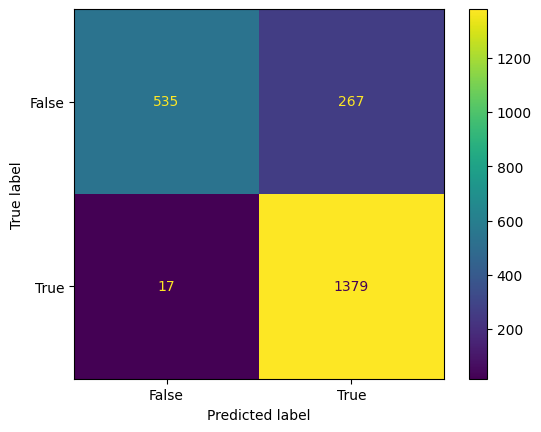

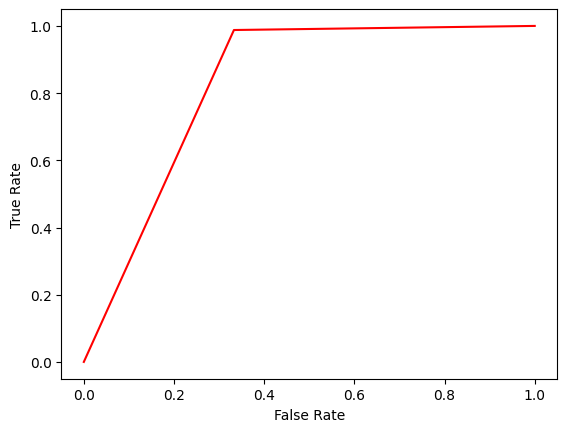

Naive Bayes accuracy:  0.8707916287534122


In [43]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test,  y_predict)
plt.plot(fpr, tpr, color='red')
plt.ylabel('True Rate')
plt.xlabel('False Rate')
plt.show()

print("Naive Bayes accuracy: ", accuracy_score(y_test, y_predict))

### 2.3 Regresja logistyczna

#### 2.3.1 Trenowanie Modelu

In [45]:
lr = LogisticRegression().fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
y_predict = lr.predict(X_test)

#### 2.3.2 Wizualizacja Modelu

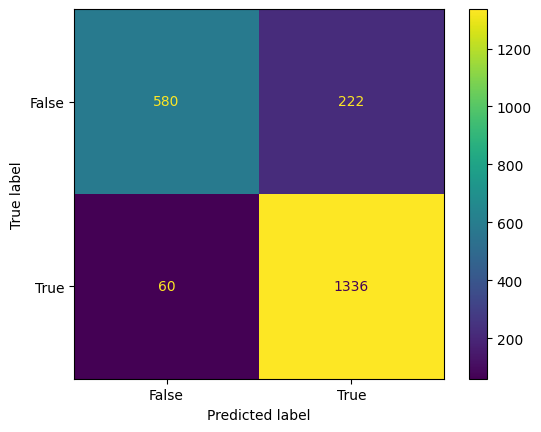

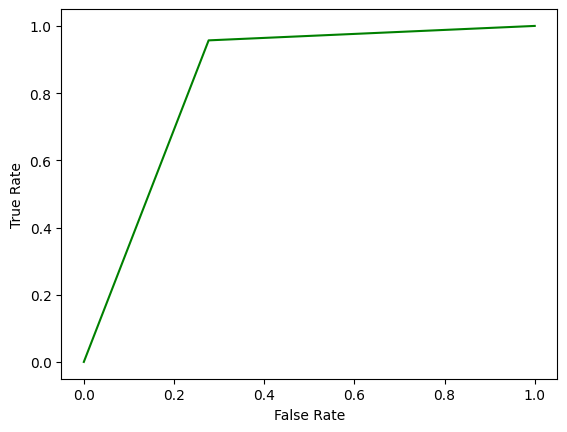

Logistic regression accuracy:  0.8717015468607825


In [46]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test,  y_predict)
plt.plot(fpr, tpr, color='green')
plt.ylabel('True Rate')
plt.xlabel('False Rate')
plt.show()

print('Logistic regression accuracy: ', lr_score)

### 2.4 Drzewo decyzyjne

#### 2.4.1 Trenowanie Modelu

In [51]:
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
clf_score = clf.score(X_test, y_test)
y_predict = clf.predict(X_test)

#### 2.4.2 Wizualizacja Modelu

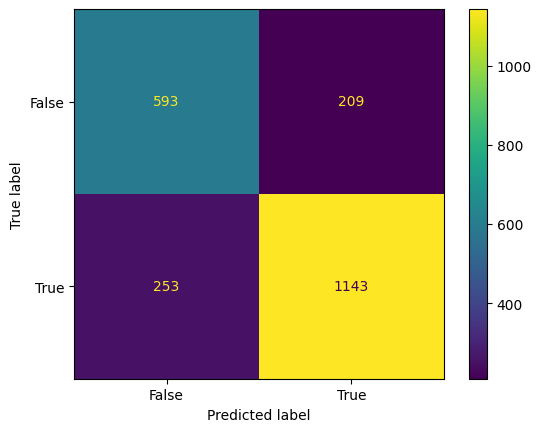

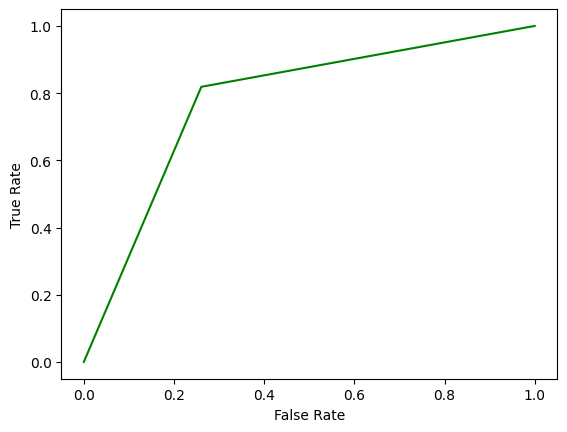

Logistic regression accuracy:  0.7898089171974523


In [52]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test,  y_predict)
plt.plot(fpr, tpr, color='green')
plt.ylabel('True Rate')
plt.xlabel('False Rate')
plt.show()

print('Logistic regression accuracy: ', clf_score)

## Etap 3: Neural Model

### 3.1 Model BLSTM

#### 3.1.1 Instalacja bibliotek

In [33]:
!pip install plot_keras_history -q

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


#### 3.1.2 Import bibliotek

In [1]:
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.text import Tokenizer
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import pad_sequences, to_categorical
from sklearn.model_selection import train_test_split

#### 3.1.3 Zczytywanie danych

In [2]:
df_labeled = pd.read_csv("labeled_data.csv", index_col=0) 
df_labeled.rename(columns={"prediction":"label"}, inplace=True)
df_labeled = df_labeled.drop("sentiment_rate",axis = 1)

df_labeled.sample(5)

,text,label
10304,listen little_girl work old copying dammmm spe...,1
16368,huw_edwards nervous king charles coronation_tr...,0
13874,king charle camilla sit new throne coronation ...,1
1813,way look_like charles raise million watercolou...,1
17648,honor coronation king charle,0


#### 3.1.4 Przygotowywanie danych

In [3]:
max_words=5000
max_len=200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_labeled["text"])
sequences = tokenizer.texts_to_sequences(df_labeled["text"])
text = pad_sequences(sequences, maxlen=max_len)
labels = to_categorical(df_labeled["label"], num_classes=2)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.1, stratify=labels, random_state=42)

#### 3.1.5 Uczenie modelu

In [5]:
model = Sequential([
    layers.Embedding(max_words, 40),
    layers.Bidirectional(layers.LSTM(10, dropout=0.5, return_sequences=True)),
    layers.LSTM(10, dropout=0.5),
    layers.Dense(2, activation="softmax")
])
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test), callbacks=[es, mc])

Epoch 1/50
619/619 [==============================] - ETA: 0s - loss: 0.4287 - accuracy: 0.7997
Epoch 1: val_loss improved from inf to 0.33573, saving model to best_model.h5
619/619 [==============================] - 43s 55ms/step - loss: 0.4287 - accuracy: 0.7997 - val_loss: 0.3357 - val_accuracy: 0.8585
Epoch 2/50
619/619 [==============================] - ETA: 0s - loss: 0.3120 - accuracy: 0.8702
Epoch 2: val_loss improved from 0.33573 to 0.31050, saving model to best_model.h5
619/619 [==============================] - 17s 27ms/step - loss: 0.3120 - accuracy: 0.8702 - val_loss: 0.3105 - val_accuracy: 0.8722
Epoch 3/50
619/619 [==============================] - ETA: 0s - loss: 0.2815 - accuracy: 0.8845
Epoch 3: val_loss improved from 0.31050 to 0.29942, saving model to best_model.h5
619/619 [==============================] - 15s 25ms/step - loss: 0.2815 - accuracy: 0.8845 - val_loss: 0.2994 - val_accuracy: 0.8794
Epoch 4/50
619/619 [==============================] - ETA: 0s - loss: 0

#### 3.1.6 Wizualizacja

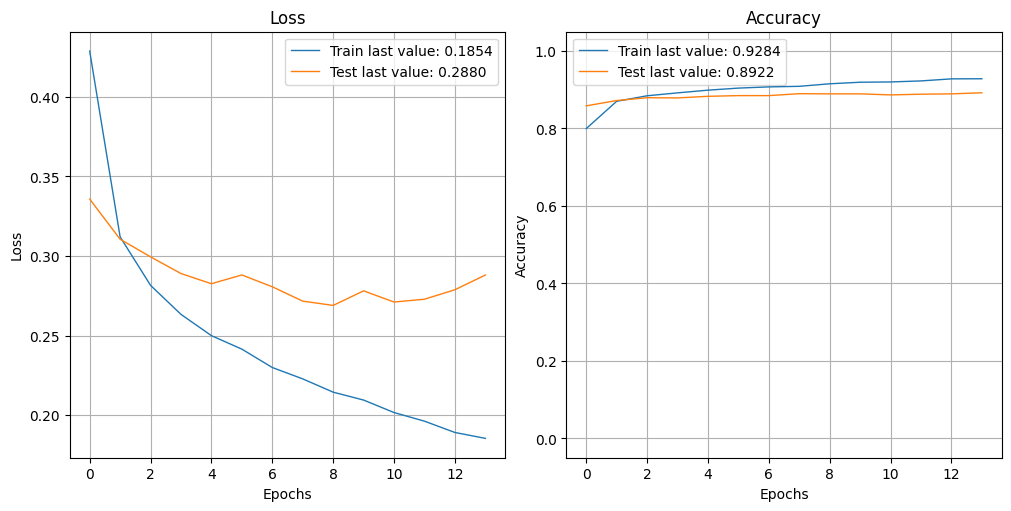

In [6]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history)
plot_history(history)
plt.close()

#### 3.1.7 Test modelu

In [7]:
model = keras.models.load_model('best_model.h5')
loss, accuracy = model.evaluate(X_test,y_test)
print("Test accuracy:", accuracy)

69/69 [==============================] - 2s 10ms/step - loss: 0.2689 - accuracy: 0.8894
Test accuracy: 0.8894449472427368


## Etap 4: Language Model
### <font color=red>UWAGA: Zmien srodowisko wykonawcze na GPU, jezeli tego jeszcze nie zrobiles/as </font> 

### 4.1 DistilBERT model

#### 4.1.1 Instalacja bibliotek

In [1]:
!pip install -U transformers
!pip install -U datasets
!pip install --upgrade accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### 4.1.2 Importowanie bibliotek

In [1]:
import transformers
import datasets
import torch
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset, load_metric


#### 4.1.3 Zczytywanie danych

In [2]:
df_labeled = pd.read_csv("labeled_data.csv", index_col=0) 
df_labeled.rename(columns={"prediction":"label"}, inplace=True)
df_labeled = df_labeled.drop("sentiment_rate",axis = 1)


ds_ = Dataset.from_pandas(df_labeled)
ds = ds_.train_test_split(0.1)
df_labeled.sample(5)

,text,label
13962,scroll coronation king charles_iii give domini...,1
1183,new_coin king charle crown_mp gyles_brandeth s...,0
20892,king charle coronation people invite e reach u...,1
3225,nep protectorate truste kenya behalf king char...,1
5748,think mainly king charle way make need change ...,1


#### 4.1.4 Przygotowywanie danych

In [3]:
model_checkpoint = 'distilbert-base-uncased'
batch_size = 32 #Przy wiekszych batch_size wyrzuca srodowisko

In [4]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

train_ds = ds['train'].map(lambda x: tokenizer(x['text']))
test_ds = ds['test'].map(lambda x: tokenizer(x['text']))

Map:   0%|          | 0/19780 [00:00<?, ? examples/s]

Map:   0%|          | 0/2198 [00:00<?, ? examples/s]

#### 4.1.5 Uczenie modelu
##### <font color=red>UWAGA: Jezeli TrainingArguments wyrzuci blad prosze zrestartowac srodowisko i uruchomic ponownie cala sekcje</font>

In [5]:
def compute_metrics(eval_preds):
  logits, labels = eval_preds
  predictions = np.argmax(logits, axis=-1)
  return metric.compute(predictions=predictions, references=labels)

In [6]:
num_labels = 2
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

args = TrainingArguments(
    f'{model_checkpoint}_sentiment_analysis',
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    num_train_epochs = 5,
    weight_decay = 0.01,
    load_best_model_at_end = True,
    metric_for_best_model = 'accuracy'
)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'classifier

In [7]:
metric = load_metric('glue', 'sst2')

trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


trainer.train()

<ipython-input-7-7f0b91379e43>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric('glue', 'sst2')
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.350000,0.250736,0.888080
2,0.240600,0.241968,0.906278
3,0.176100,0.257552,0.909008
4,0.122100,0.321207,0.912648
5,0.057700,0.366725,0.912193


TrainOutput(global_step=3095, training_loss=0.16916275918002274, metrics={'train_runtime': 475.0184, 'train_samples_per_second': 208.202, 'train_steps_per_second': 6.516, 'total_flos': 1200393694081872.0, 'train_loss': 0.16916275918002274, 'epoch': 5.0})

#### 4.1.6 Testowanie modelu

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'


text = "Our King has been crowned!" # Pozytywna wiadomosc
inputs = tokenizer(text, return_tensors='pt')
input_ids = inputs['input_ids'].to(device)
attention_mask = inputs['attention_mask'].to(device)


In [16]:
with torch.no_grad():
  output = model(input_ids=input_ids, attention_mask=attention_mask)
  logits = output.logits
  predictions = torch.argmax(logits, dim=-1)

In [18]:
if predictions.item() == 1: print('This text is negative')
else: print('This text is positive')

This text is positive


In [19]:
text = "the racist King Charles can go fuck himself with his white supremacy royal title." # Negatywma wiadomosc (nie ja to pisalem, wzieto to z puli scrapowanych danych)
inputs = tokenizer(text, return_tensors='pt')
input_ids = inputs['input_ids'].to(device)
attention_mask = inputs['attention_mask'].to(device)

In [20]:
with torch.no_grad():
  output = model(input_ids=input_ids, attention_mask=attention_mask)
  logits = output.logits
  predictions = torch.argmax(logits, dim=-1)

In [21]:
if predictions.item() == 1: print('This text is negative')
else: print('This text is positive')

This text is negative
